In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf



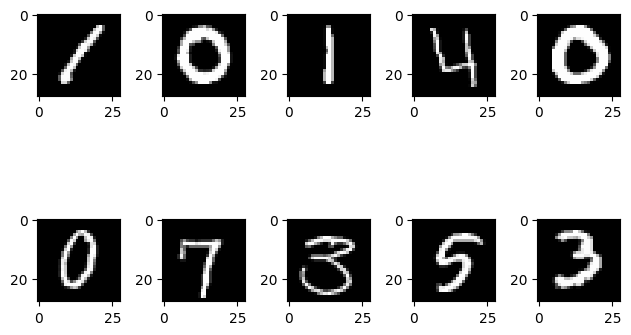

In [2]:
df =pd.read_csv('train.csv')
df
#잘 정제된 데이터라서 이상치나 결측치는 없지만
#현업데이터를 처리할때는 반드시 체크해야 함
#정규화 하기 전에 일단 이미지가 어떤 이미지인지 눈으로 한번 확인

img_data = df.drop('label',axis=1,inplace=False).values

#10장의 그림 확인
#2행 5열로 출력
fig = plt.figure()
fig_arr = []
for i in range(10):
    fig_arr.append(fig.add_subplot(2,5,i+1))

    fig_arr[i].imshow(img_data[i].reshape(28,28),
                      cmap = 'gray',
                      interpolation = 'nearest')
    
plt.tight_layout()
plt.show()    

In [3]:
x_data = df.drop('label',axis=1, inplace=False).values
t_data = df['label'].values

scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3,
                 stratify=t_data,
                 random_state=1)
# 학습 데이터 : 29400 개
# 평가용 데이터 : 12600 개 
physical_devices = tf.config.list_physical_devices('GPU')
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)


In [4]:
keras_model = Sequential()
keras_model.add(Flatten(input_shape = (784,)))
keras_model.add(Dense(units = 10,
                      activation = 'softmax'))
keras_model.compile(optimizer = Adam(learning_rate=3e-4),
                    loss='sparse_categorical_crossentropy',
                    metrics = ['acc'])
keras_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = keras_model.fit(x_data_train_norm,
                          t_data_train,
                          epochs = 100,
                          verbose = 1,
                          validation_split = 0.2,
                          batch_size=1000000
                          )

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 2.3800 - acc: 0.0949 - val_loss: 2.3542 - val_acc: 0.0980
Epoch 2/100
1/1 [==============================] - 0s 55ms/step - loss: 2.3628 - acc: 0.0991 - val_loss: 2.3374 - val_acc: 0.1044
Epoch 3/100
1/1 [==============================] - 0s 60ms/step - loss: 2.3459 - acc: 0.1040 - val_loss: 2.3208 - val_acc: 0.1078
Epoch 4/100
1/1 [==============================] - 0s 60ms/step - loss: 2.3292 - acc: 0.1101 - val_loss: 2.3044 - val_acc: 0.1155
Epoch 5/100
1/1 [==============================] - 0s 53ms/step - loss: 2.3127 - acc: 0.1158 - val_loss: 2.2883 - val_acc: 0.1228
Epoch 6/100
1/1 [==============================] - 0s 53ms/step - loss: 2.2964 - acc: 0.1231 - val_loss: 2.2723 - val_acc: 0.1311
Epoch 7/100
1/1 [==============================] - 0s 54ms/step - loss: 2.2803 - acc: 0.1306 - val_loss: 2.2566 - val_acc: 0.1405
Epoch 8/100
1/1 [==============================] - 0s 54ms/step - loss: 2.2645 - acc: 0.1382

In [6]:
#평가 진행
print(keras_model.evaluate(x_data_test_norm,t_data_test))
#[0.2912431061267853, 0.9181746244430542] learning rate 1e-4
#[0.5266591310501099, 0.8945237994194031] leraning rate 1e-2
#[0.4653301239013672, 0.879365086555481] leraning rate 1e-5
#[0.2822009325027466, 0.9199206233024597] leraning rate 2e-4
#[0.2826203405857086, 0.9214285612106323] leraning rate 3e-4 << 근처에선 이게 젤 높네
#[0.3051552474498749, 0.9184126853942871] leraning rate 1e-3
#[0.3396199643611908, 0.9123809337615967] leraning rate 2e-3
#[0.2845483720302582, 0.9204761981964111] leraning rate 4e-3
predict_label = tf.argmax(keras_model.predict(x_data_test_norm),axis = 1).numpy()
print(classification_report(t_data_test,predict_label))

394/394 [==============================] - 1s 2ms/step - loss: 1.3121 - acc: 0.7394
[1.3121343851089478, 0.7394444346427917]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1240
           1       0.79      0.84      0.82      1405
           2       0.81      0.72      0.76      1253
           3       0.66      0.74      0.70      1305
           4       0.78      0.59      0.67      1222
           5       0.79      0.55      0.65      1139
           6       0.77      0.87      0.82      1241
           7       0.79      0.78      0.78      1320
           8       0.64      0.68      0.66      1219
           9       0.61      0.75      0.68      1256

    accuracy                           0.74     12600
   macro avg       0.75      0.74      0.74     12600
weighted avg       0.75      0.74      0.74     12600



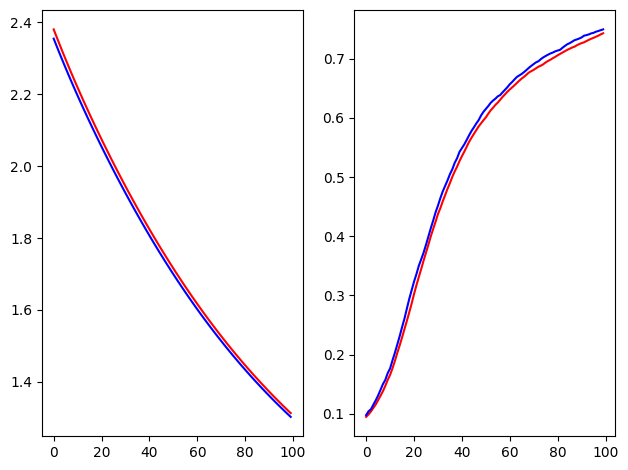

In [7]:
loss = history.history['loss']
acc = history.history['acc']

val_loss = history.history['val_loss']
val_acc = history.history['val_acc']

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(loss, color='r')
ax1.plot(val_loss, color='b')

ax2.plot(acc, color='r')
ax2.plot(val_acc, color='b')

plt.tight_layout()
plt.show()

In [8]:
test = pd.read_csv('test.csv')
x_data_test = test.values

scaler = MinMaxScaler()
scaler.fit(x_data_test)
x_data_norm_test = scaler.transform(x_data_test)
test_predictions = tf.argmax(keras_model.predict(x_data_norm_test),axis = 1).numpy()

In [9]:
sub = pd.read_csv('sample_submission.csv')
tf.argmax(keras_model.predict(x_data_test_norm),axis = 1).numpy()

sub['Label'] = test_predictions
sub.to_csv('my_model_predict.csv', index=False)


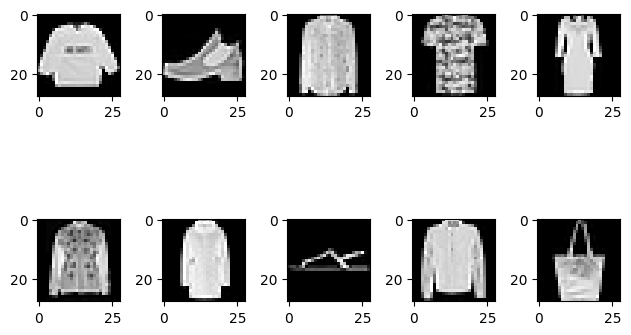

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1/1 [==============================] - 1s 661ms/step - loss: 2.4686 - acc: 0.0714 - val_loss: 2.4571 - val_acc: 0.0774
Epoch 2/100
1/1 [==============================] - 0s 69ms/step - loss: 2.4556 - acc: 0.0743 - val_loss: 2.4441 - val_acc: 0.0810
Epoch 3/100
1/1 [==============================] - 0s 68ms/step - loss: 2.4427 - acc: 0.0781 - val_loss: 2.4313 - val_acc: 0.0855
Epoch 4/100
1/1 [==============================] - 0s 76ms/step - loss: 2.4301 - acc: 0.0824 - val_loss: 2.4188 - val_acc: 

In [10]:
# Fashion-MNIST 데이터를 이용해서 학습과 평가를 진행해 보아요!
# 필요한 module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Raw Data Loading
df = pd.read_csv('fashion-mnist_train.csv')

# print(df.shape)  #
# display(df.head())  # 5 rows × 785 columns
# 확인해보니... 784개의 pixel정보가 있어요! label이 target(종속변수예요!)
# 독립변수(feature)는 당연히 784개예요!

# 결측치나 이상치는 없어요! (잘 정제되서 제공된 데이터이기때문이예요!)
# 하지만 현업데이터를 처리할때는 반드시 체크해야 해요!

# 정규화 하기 전에 일단 이 이미지가 어떤 이미지인지 눈으로 한번 확인하고
# 넘어가요!

img_data = df.drop('label', axis=1, inplace=False).values

# 10장의 그림을 확인해 보아요!
# 2행 5열로 출력할 꺼예요! => subplot을 이용해서 그리면 되요!
fig = plt.figure()  # 큰 도화지를 준비해요.
fig_arr = []  # subplot을 저장하는 list

for n in range(10):
    fig_arr.append(fig.add_subplot(2,5,n+1))

    fig_arr[n].imshow(img_data[n].reshape(28,28),
                      cmap='gray',
                      interpolation='nearest')

plt.tight_layout()
plt.show()

# feature enginnering 할게 없어요!

x_data = df.drop('label', axis=1, inplace=False).values
t_data = df['label'].values # one-hot encoding처리를 해야 해요!
                            # keras기능을 이용해서 one-hot을 자동으로 처리!

# 정규화는 당연히 진행해야 해요!
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# train데이터와 test데이터로 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3,
                 stratify=t_data,
                 random_state=1)

keras_model = Sequential()

keras_model.add(Flatten(input_shape=(784,)))

keras_model.add(Dense(units=10,
                      activation='softmax'))

keras_model.compile(optimizer=Adam(learning_rate=1e-4),
                    loss='sparse_categorical_crossentropy',
                    metrics = ['acc'])

keras_model.summary()

# 학습을 진행해요!
# 자 우리 데이터는 총 몇개냐하면..
history  = keras_model.fit(x_data_train_norm,
                           t_data_train,
                           epochs=100,
                           verbose=1,
                           validation_split=0.2,
                           batch_size=100000
                           )

# 학습이 잘 진행되었어요!
# 이제 평가를 진행해 보아요!
print(keras_model.evaluate(x_data_test_norm, t_data_test))
# [0.29038316011428833, 0.9174603223800659]

# 결과 report(accuracy, recall, precision, f1)값을 구해보아요!
# classification_report()를 이용하는데.. 주의해야 할 점은 one-hot 으로 표현하지
# 않아요. 1차원으로 표현해요(label값을 이용한 1차원 값으로 사용)

import tensorflow as tf
# 확률값을 label값으로 변환해야 해요!
predit_label = tf.argmax(keras_model.predict(x_data_test_norm), axis=1).numpy()

print(classification_report(t_data_test, predit_label))

In [11]:
#흑백을 쓰면은  이런식으로 2차원 배열 구성 가능. 흑백은 숫자하나로 강도를 표시할 수 있음
[[흑,백,흑,백],
 [흑,백,흑,백],
 [흑,백,흑,백] ]
 

#색깔이 들어가면 3차원 배열 이여야 함. 
[[[r,g,b],[r,g,b],[r,g,b],[r,g,b]],
[[r,g,b],[r,g,b],[r,g,b],[r,g,b]],
[[r,g,b],[r,g,b],[r,g,b],[r,g,b]]] 

#이 화면이 여러개 뭉쳐지면 4차원 배열 
[[[[r,g,b],[r,g,b],[r,g,b],[r,g,b]],
[[r,g,b],[r,g,b],[r,g,b],[r,g,b]],
[[r,g,b],[r,g,b],[r,g,b],[r,g,b]]],
[[[r,g,b],[r,g,b],[r,g,b],[r,g,b]],
[[r,g,b],[r,g,b],[r,g,b],[r,g,b]],
[[r,g,b],[r,g,b],[r,g,b],[r,g,b]]],
[[[r,g,b],[r,g,b],[r,g,b],[r,g,b]],
[[r,g,b],[r,g,b],[r,g,b],[r,g,b]],
[[r,g,b],[r,g,b],[r,g,b],[r,g,b]]]]


NameError: name '흑' is not defined

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"


In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

In [ ]:
! nvidia-smi

In [ ]:
import os
import tensorflow as tf 
from tensorflow.python.client import device_lib
os.environ["CUDA_VISIBLE_DEVICES"] = "0"


In [ ]:
import tensorflow as tf 
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices() )


In [ ]:
tf.__version__
tf.test.is_built_with_cuda()